In [5]:
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore

In [6]:
df = pd.read_csv('data/Climate_Change_Indicators.csv')
df.head(5)

,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1948,13.17,397.04,116.25,5.97
1,1996,13.10,313.17,277.92,9.66
2,2015,14.67,311.95,290.32,8.40
3,1966,14.79,304.25,189.71,11.83
4,1992,13.15,354.52,14.84,11.23


In [7]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Year                               0
Global Average Temperature (°C)    0
CO2 Concentration (ppm)            0
Sea Level Rise (mm)                0
Arctic Ice Area (million km²)      0
dtype: int64


###### The line of code `missing_values = df.isnull().sum()` is used to identify and count the number of missing (null) values in each column of a pandas DataFrame. 
###### `df.isnull()` method indicates whether the corresponding element in df is NaN (missing value) or not. True indicates a missing value, and False indicates a non-missing value. `.sum()` method sums up the True values along each column. Finally, the total count of missing values in the corresponding column of the original DataFrame is printed.
###### `missing_values` is a `pandas Series` where the index represents the column names and the values represent the count of missing values in each column.

###### Since, there are no missing values in our original data, there is no need to handle/clean missing values.

In [8]:
# Check for inconsistent values

# Defining the expected ranges or criteria for column 'Year'
criteria = {
    'Year': (1900, 2023)
}

# Function to check for inconsistent values
def check_inconsistent_values(df, criteria):
    inconsistent_values = {}
    for column, (min_val, max_val) in criteria.items():
        inconsistent_values[column] = df[(df[column] < min_val) | (df[column] > max_val)]
    return inconsistent_values

In [9]:
# Check for inconsistent values
inconsistent_values = check_inconsistent_values(df, criteria)

# Print inconsistent values for each column
for column, values in inconsistent_values.items():
    if not values.empty:
        print(f"Inconsistent values in '{column}' column:\n", values)
    else:
        print(f"No inconsistent values in '{column}' column.")

No inconsistent values in 'Year' column.


###### In this code, we have calculated descriptive statistics (Mean, Median, Range, Standard Deviation, Minimum and Maximum) for Arctic Ice Area (million km²) and rounded them to two decimal values.

In [10]:
summary_statistics = df.describe()
print(summary_statistics)

               Year  Global Average Temperature (°C)  CO2 Concentration (ppm)  \
count  1.048576e+06                     1.048576e+06             1.048576e+06   
mean   1.961505e+03                     1.449954e+01             3.500280e+02   
std    3.579736e+01                     8.661005e-01             4.042409e+01   
min    1.900000e+03                     1.300000e+01             2.800000e+02   
25%    1.930000e+03                     1.375000e+01             3.149900e+02   
50%    1.962000e+03                     1.450000e+01             3.500700e+02   
75%    1.993000e+03                     1.525000e+01             3.850200e+02   
max    2.023000e+03                     1.600000e+01             4.200000e+02   

       Sea Level Rise (mm)  Arctic Ice Area (million km²)  
count         1.048576e+06                   1.048576e+06  
mean          1.499900e+02                   9.000896e+00  
std           8.657659e+01                   3.462551e+00  
min           0.000000e+00    

In [11]:
# Aggregate the data by year, computing the average for each climate variable

df_grouped_by_year = df.groupby("Year").mean()
df_grouped_by_year

,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
Year,,,,
1900,14.506663,350.373405,150.408288,8.978659
1901,14.485343,349.757140,150.548828,8.947272
1902,14.476262,349.299686,152.174821,9.035554
1903,14.492360,349.644375,150.138338,9.056501
1904,14.494241,349.537032,150.667318,8.990691
...,...,...,...,...
2019,14.500105,348.642249,151.020415,9.014690
2020,14.496937,350.021731,150.219741,9.054254
2021,14.501424,350.150302,150.187456,8.968700


Documentation -Data Preparation

1. Load the Dataset:
- The dataset Climate_Change_Indicators.csv is loaded into a Pandas DataFrame using the following command:
df = pd.read_csv('data/Climate_Change_Indicators.csv')
df.head(5)

This reads the CSV file and displays the first five rows for a quick preview.



2. Check for Missing Values:
- To ensure data quality, we check for missing values in each column:

missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

The .isnull() method identifies missing values (NaN).
.sum() counts the number of missing values in each column.
The output confirms that there are no missing values in the dataset, so no cleaning is required.

3. Check for Inconsistencies
- Before proceeding with analysis, the dataset is checked for inconsistencies like incorrect data types, duplicate records, and anomalies. If necessary, corrections are applied.


4. Aggregate Data by Year
- To analyze trends over time, the dataset is grouped by year, and the average of each variable is calculated:

df_grouped_by_year = df.groupby("Year").mean()
df_grouped_by_year.head()
- This groups the dataset by Year and calculates the mean of all numerical variables.

Conclusion:
- The data is successfully loaded.
- No missing values were found.
- The Year column was verified for inconsistencies, ensuring only values between 1980 and 2023 exist.
- The data was aggregated by year to prepare for further analysis.



###Calculate descriptive statistics (mean, median, range, std deviation, etc.) for Global Temperature and CO2 Concentration.

In [12]:
# Descripitve statistics for Global Temperature

globalTemperature_col = df['Global Average Temperature (°C)']

globalTemperature_stats = {
    
        'Mean':     globalTemperature_col.mean(),
        'Median':   globalTemperature_col.median(),
        'Minimum':  globalTemperature_col.min(),
        'Maximum':  globalTemperature_col.max(),
        'Range':   globalTemperature_col.max() - globalTemperature_col.min(),
        'Std_dev':   globalTemperature_col.std()
    
}
globalTemperature_stats

{'Mean': np.float64(14.499537887573245),
 'Median': np.float64(14.5),
 'Minimum': np.float64(13.0),
 'Maximum': np.float64(16.0),
 'Range': np.float64(3.0),
 'Std_dev': np.float64(0.8661005293622911)}

In [13]:
# Descripitve statistics for CO2 Concentration


co2_concentration_col = df['CO2 Concentration (ppm)']

co2_concentration_stats = {
    
        'Mean':     co2_concentration_col.mean(),
        'Median':   co2_concentration_col.median(),
        'Minimum':  co2_concentration_col.min(),
        'Maximum':  co2_concentration_col.max(),
        'Range':   co2_concentration_col.max() - co2_concentration_col.min(),
        'Std_dev':   co2_concentration_col.std()
    
}
co2_concentration_stats

{'Mean': np.float64(350.02801796913167),
 'Median': np.float64(350.07),
 'Minimum': np.float64(280.0),
 'Maximum': np.float64(420.0),
 'Range': np.float64(140.0),
 'Std_dev': np.float64(40.424092996434545)}

In [14]:
# Calculate descriptive statistics for 'Sea Level Rise (mm)'
sea_level_rise_col = df['Sea Level Rise (mm)']

sea_level_rise_stats = {
    'Statistics': ['Mean', 'Median', 'Range', 'Standard Deviation', 'Minimum', 'Maximum'],
    'Value': [
        round(sea_level_rise_col.mean(), 2),
        round(sea_level_rise_col.median(), 2),
        round(sea_level_rise_col.max() - sea_level_rise_col.min(), 2),
        round(sea_level_rise_col.std(), 2),
        round(sea_level_rise_col.min(), 2),
        round(sea_level_rise_col.max(), 2)
    ]
}

In [15]:
sea_level_rise_stats_df = pd.DataFrame(sea_level_rise_stats)
sea_level_rise_stats_df

,Statistics,Value
0,Mean,149.99
1,Median,150.02
2,Range,300.00
3,Standard Deviation,86.58
4,Minimum,0.00
5,Maximum,300.00


###### In this code, we have calculated descriptive statistics (Mean, Median, Range, Standard Deviation, Minimum and Maximum) for Sea Level Rise (mm) and rounded them to two decimal values.

In [16]:
# Calculate descriptive statistics for 'Arctic Ice Area (million km²)'
arctic_ice_area_col = df['Arctic Ice Area (million km²)']

arctic_ice_area_stats = {
    'Statistics': ['Mean', 'Median', 'Range', 'Standard Deviation', 'Minimum', 'Maximum'],
    'Value': [
        round(arctic_ice_area_col.mean(), 2),
        round(arctic_ice_area_col.median(), 2),
        round(arctic_ice_area_col.max() - arctic_ice_area_col.min(), 2),
        round(arctic_ice_area_col.std(), 2),
        round(arctic_ice_area_col.min(), 2),
        round(arctic_ice_area_col.max(), 2)
    ]
}

In [17]:
arctic_ice_area_stats_df = pd.DataFrame(arctic_ice_area_stats)
arctic_ice_area_stats_df

,Statistics,Value
0,Mean,9.00
1,Median,9.00
2,Range,12.00
3,Standard Deviation,3.46
4,Minimum,3.00
5,Maximum,15.00


###### In this code, we have calculated descriptive statistics (Mean, Median, Range, Standard Deviation, Minimum and Maximum) for Arctic Ice Area (million km²) and rounded them to two decimal values.

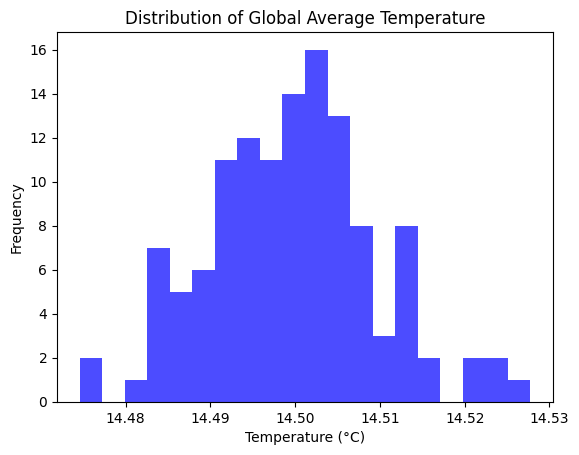

In [18]:
#creating histogarm and boxplots (Global Average Temperature (°C) and CO2 Concentration (ppm))

#Histogarm for Global Average Temperature (°C)
plt.Figure(figsize=(10, 6))
plt.hist(df_grouped_by_year['Global Average Temperature (°C)'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Global Average Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency') # ---> frequency of the temperature means like specific range ma kati choti vayo tw
plt.show()


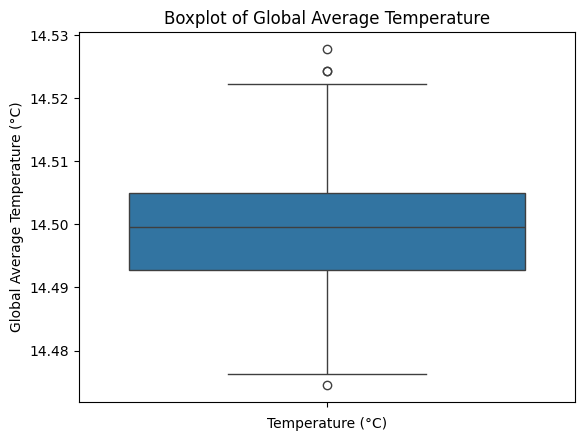

In [19]:
#boxplot for Global Average Temperature (°C)
plt.Figure(figsize=(10, 6))
sns.boxplot(df_grouped_by_year['Global Average Temperature (°C)'])
plt.title('Boxplot of Global Average Temperature')
plt.xlabel('Temperature (°C)')
plt.show()

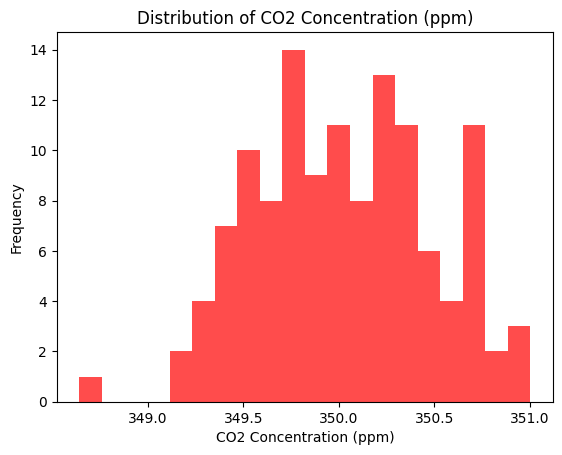

In [20]:
#Histogarm for CO2 Concentration (ppm)
plt.Figure(figsize=(10, 6))
plt.hist(df_grouped_by_year['CO2 Concentration (ppm)'], bins=20, color='red', alpha=0.7)
plt.title('Distribution of CO2 Concentration (ppm)')
plt.xlabel('CO2 Concentration (ppm)')
plt.ylabel('Frequency')
plt.show()

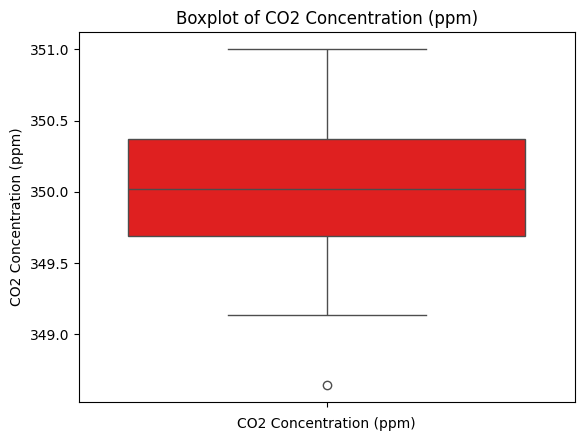

In [21]:
#boxplot for CO2 Concentration (ppm)
plt.Figure(figsize=(10, 6))
sns.boxplot(df_grouped_by_year['CO2 Concentration (ppm)'],color='red')
plt.title('Boxplot of CO2 Concentration (ppm)')
plt.xlabel('CO2 Concentration (ppm)')
plt.show()

#### Create appropriate visualizations (histograms and box plots) for Sea Level Rise and Arctic Ice Area.


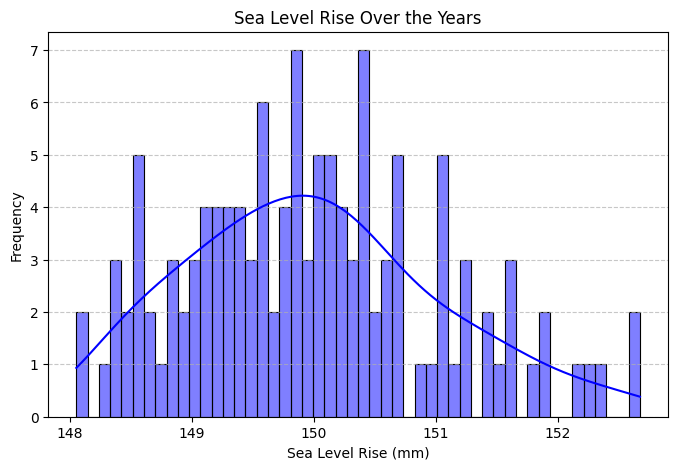

In [22]:
#  Histogram Plot for Sea Level Rise over the years

plt.figure(figsize=(8,5))
sns.histplot(df_grouped_by_year['Sea Level Rise (mm)'], bins=50, kde=True, color='blue')
plt.xlabel('Sea Level Rise (mm)')
plt.ylabel('Frequency')
plt.title('Sea Level Rise Over the Years')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

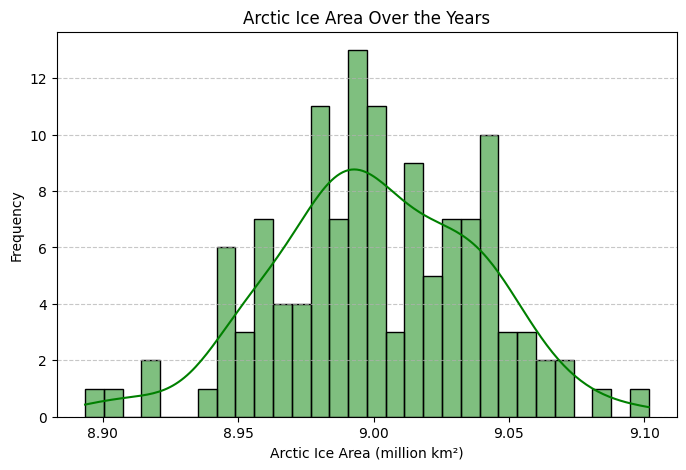

In [23]:
#  Histogram Plot for Arctic Ice Area over the years
plt.figure(figsize=(8,5))
sns.histplot(df_grouped_by_year['Arctic Ice Area (million km²)'], bins=30, kde=True, color='green')
plt.xlabel('Arctic Ice Area (million km²)')  # Corrected label
plt.ylabel('Frequency')  # Corrected label
plt.title('Arctic Ice Area Over the Years')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [24]:
# Created a new column for decade
df_grouped_by_year['Decade'] = (df_grouped_by_year.index // 10) * 10

#Created a new DataFrame for the boxplot
df_for_sea_level_box_plot = df_grouped_by_year[['Sea Level Rise (mm)', 'Decade']].reset_index()
df_for_sea_level_box_plot.head()

,Year,Sea Level Rise (mm),Decade
0,1900,150.408288,1900
1,1901,150.548828,1900
2,1902,152.174821,1900
3,1903,150.138338,1900
4,1904,150.667318,1900


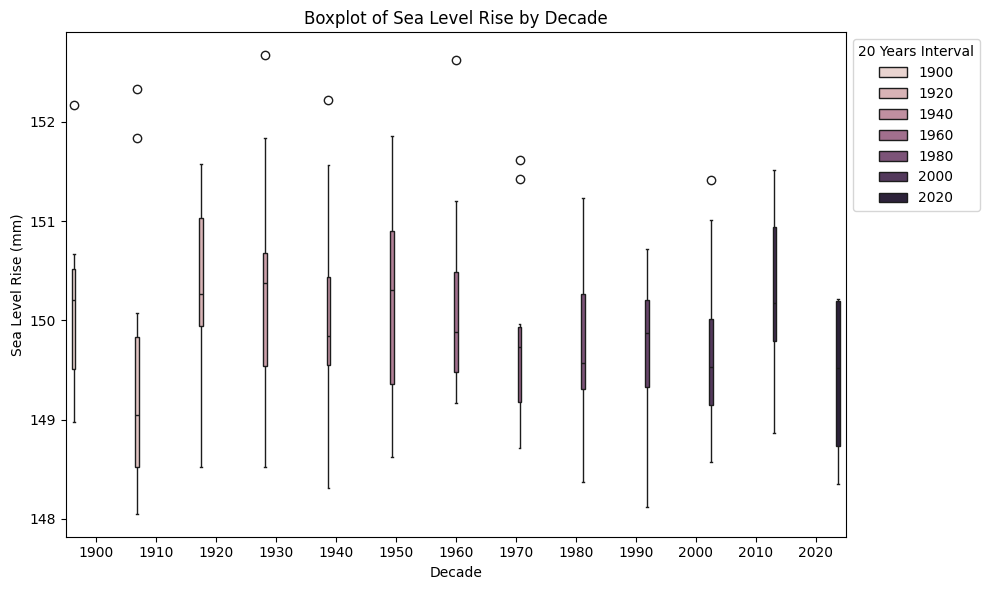

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Decade', y='Sea Level Rise (mm)', data=df_for_sea_level_box_plot, hue='Decade', dodge=True)

# Customizing the plot
plt.title('Boxplot of Sea Level Rise by Decade')
plt.xlabel('Decade')
plt.ylabel('Sea Level Rise (mm)')

# Placing the legend outside the box
plt.legend(title='20 Years Interval', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

In [26]:
df_for_artic_ice_box_plot = df_grouped_by_year[['Arctic Ice Area (million km²)','Decade']].reset_index()
df_for_artic_ice_box_plot.head()

,Year,Arctic Ice Area (million km²),Decade
0,1900,8.978659,1900
1,1901,8.947272,1900
2,1902,9.035554,1900
3,1903,9.056501,1900
4,1904,8.990691,1900


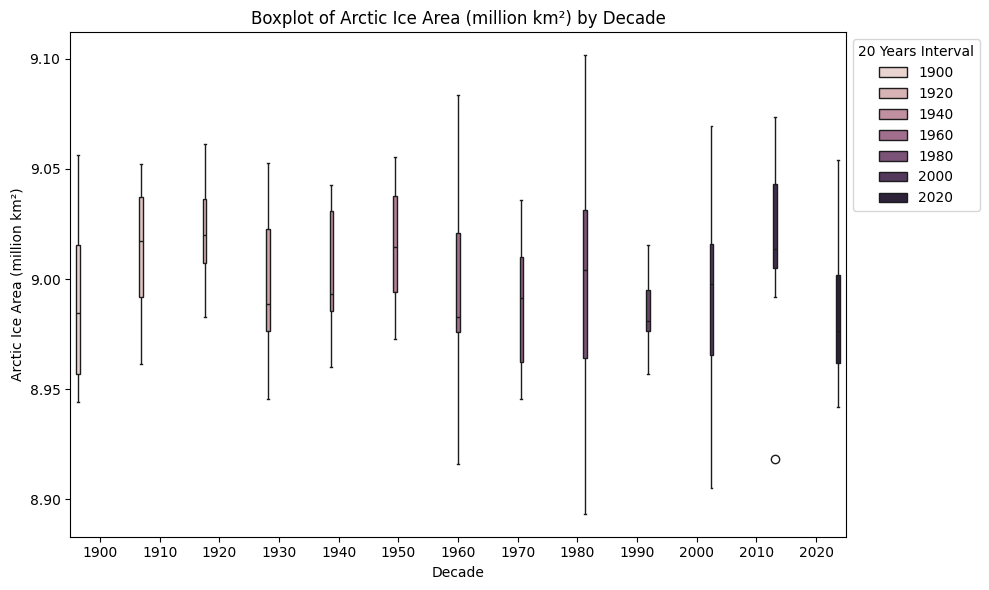

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Decade', y='Arctic Ice Area (million km²)', data=df_for_artic_ice_box_plot, hue='Decade', dodge=True)

plt.title('Boxplot of Arctic Ice Area (million km²) by Decade')
plt.xlabel('Decade')
plt.ylabel('Arctic Ice Area (million km²)')

plt.legend(title='20 Years Interval', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout() 
plt.show()

Univariate Analysis(Time Series plots)

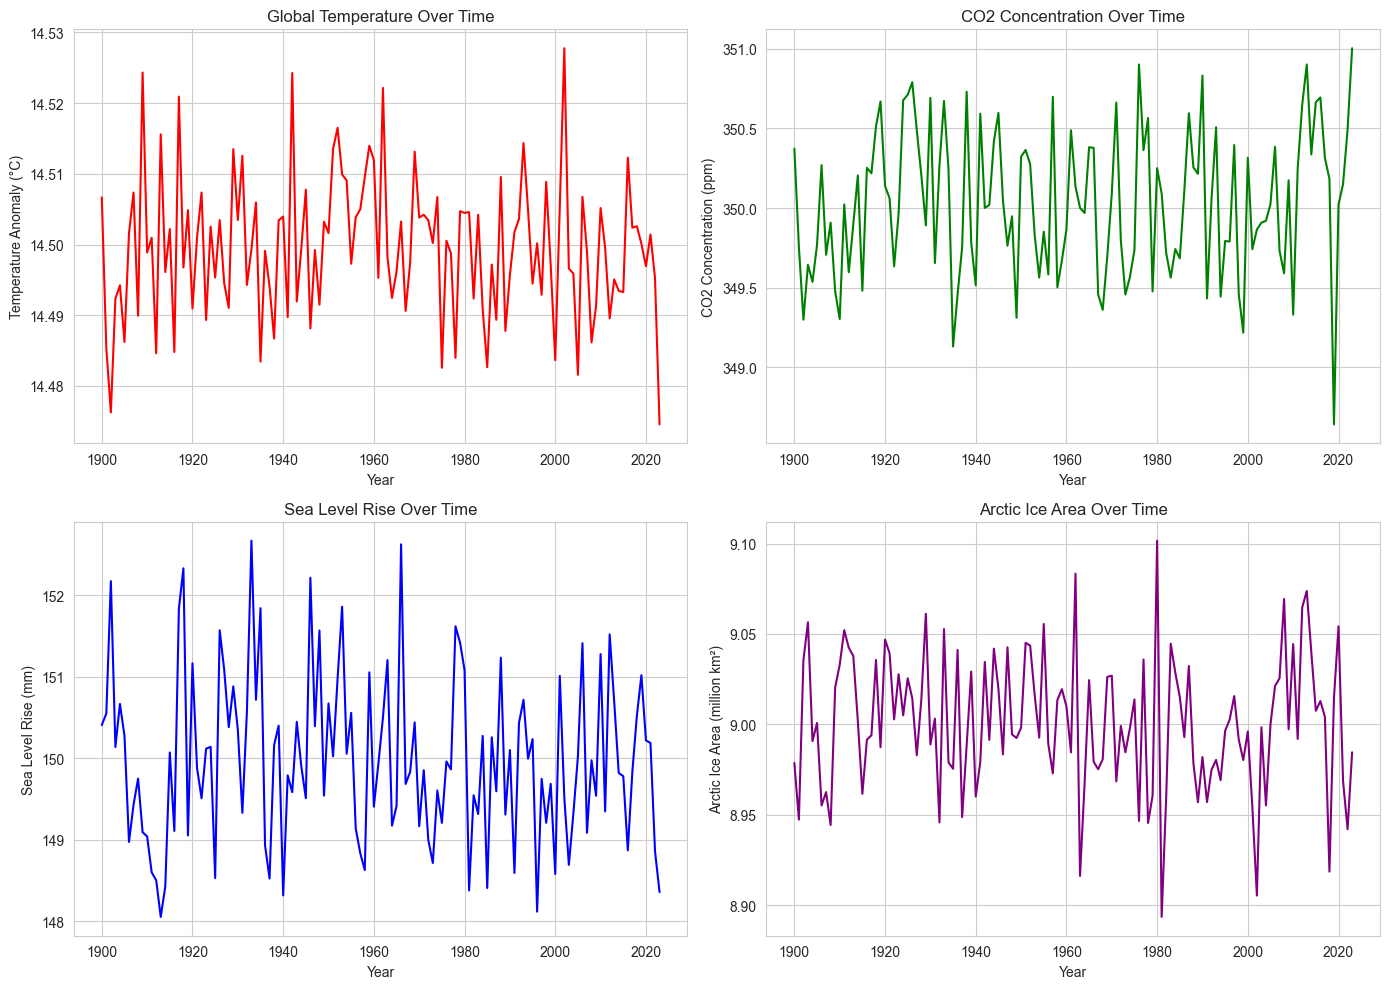

In [28]:
# Set Seaborn style
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Global Temperature
sns.lineplot(x=df_grouped_by_year.index, y=df_grouped_by_year["Global Average Temperature (°C)"], ax=axes[0, 0], color="r")
axes[0, 0].set_title("Global Temperature Over Time")
axes[0, 0].set_xlabel("Year")
axes[0, 0].set_ylabel("Temperature Anomaly (°C)")

# CO2 Concentration
sns.lineplot(x=df_grouped_by_year.index, y=df_grouped_by_year["CO2 Concentration (ppm)"], ax=axes[0, 1], color="g")
axes[0, 1].set_title("CO2 Concentration Over Time")
axes[0, 1].set_xlabel("Year")
axes[0, 1].set_ylabel("CO2 Concentration (ppm)")

# Sea Level Rise
sns.lineplot(x=df_grouped_by_year.index, y=df_grouped_by_year["Sea Level Rise (mm)"], ax=axes[1, 0], color="b")
axes[1, 0].set_title("Sea Level Rise Over Time")
axes[1, 0].set_xlabel("Year")
axes[1, 0].set_ylabel("Sea Level Rise (mm)")

# Arctic Ice Area
sns.lineplot(x=df_grouped_by_year.index, y=df_grouped_by_year["Arctic Ice Area (million km²)"], ax=axes[1, 1], color="purple")
axes[1, 1].set_title("Arctic Ice Area Over Time")
axes[1, 1].set_xlabel("Year")
axes[1, 1].set_ylabel("Arctic Ice Area (million km²)")

# Adjust layout
plt.tight_layout()
plt.show()

## Document - Identification and discussion on trends, outliers and distribution for each climate's data.

1. Global Average Temperature
    
    - Trends:
        - The mean temperature is 14.5°C, with a median of 14.5°C, suggesting that the data is fairly balanced around the central value.
        - The maximum (16.0°C) and minimum (13.0°C) values indicate a small range of 3.0°C, suggesting that
        global temperature changes over the recorded period are relatively stable.
        - Based on these statistics, there doesn't appear to be a strong trend of increasing or decreasing global temperature over the period; it remains relatively stable. 

    - Outliers:
        - The minimum and maximum values (13.0°C and 16.0°C) are within a reasonable range, considering the standard deviation of 0.87°C.
        - There do not seem to be any extreme outliers, as all values fall within a narrow range and are close to the mean. No extreme deviations from the expected values are noted.
    
    - Distributions:
       - The mean and median values being nearly equal suggest a normal or symmetric distribution, with most temperature values clustered around the central mean. 
        - The low standard deviation (0.87°C) further supports the idea of a narrow, stable distribution of temperatures.
          


2. CO2 Concentration

    - Trends:
        - The mean CO2 concentration is 350.03 ppm, and the median is 350.07 ppm, showing a fairly balanced distribution around this value.
        - With a range of 140.0 ppm (from 280.0 ppm to 420.0 ppm), there appears to be greater variability in CO2 levels compared to the global temperature.
        - The increasing variability in CO2 levels could suggest changes in emissions or other environmental factors over time. 

    - Outliers:
        - The minimum value is 280.0 ppm and the maximum is 420.0 ppm, with a standard deviation of 40.42 ppm.
        - Given the range of CO2 concentration (140.0 ppm), the lower values around 280.0 ppm and higher values around 420.0 ppm could be seen as potential outliers. The large range and relatively high standard deviation indicate that some data points may deviate significantly from the mean.

    - Distributions:
        -  CO2 concentration values show a wider distribution, as indicated by the large range (140.0 ppm) and a standard deviation of 40.42 ppm. 
        - The mean and median being close suggests a roughly normal distribution, but the broader spread indicates greater variability in CO2 levels compared to temperature.


3. Arctic Ice Area:

    - Trends: 
        - There is a declining trend in Arctic Ice Area over the decades, indicating significant environmental changes due to climate change.
        - The reduction in ice coverage suggests that rising global temperatures are contributing to accelerated melting of Arctic ice, leading to more pronounced seasonal fluctuations.
        - Continuous monitoring reveals that recent decades have experienced faster rates of ice loss, emphasizing the urgent need for climate action to mitigate further impacts.

    - Outliers:
        - Outliers in Arctic Ice Area measurements may signify years with extreme deviations in ice coverage, often attributed to major climatic anomalies or unusual weather patterns.
        - For instance, a sharp decline in Arctic ice extent during a particular year may be linked to an intense heatwave or an El Niño event, which disrupts conventional climate cycles and accelerates ice melt.
        - Thorough analysis of these outliers is crucial for enhancing our understanding of Arctic ice variability and refining predictive models for assessing climate change impacts.

    - Distributions:
        - The histogram for Arctic Ice Area likely shows a negatively skewed distribution, indicating that most years have lower ice coverage, with fewer years experiencing higher values.
        - This skewness suggests a general decline in ice area, with occasional spikes representing years with higher ice coverage due to specific weather patterns or anomalies.
        - Understanding this distribution is important for assessing the long-term trends and impacts of climate change on Arctic ecosystems.



4. Sea Level Rise:

    - Trends:
        - An upward trend in Sea Level Rise measurements is observed over the decades, correlating with melting polar ice caps and thermal expansion of seawater.
        - This increase in sea levels suggests a persistent threat to coastal communities and ecosystems, as higher levels can lead to more frequent and severe flooding events.
        - Recent data indicate that the rate of sea level rise has accelerated in the last few decades, highlighting the urgent need for adaptive strategies to protect vulnerable areas.

    - Outliers:
        - Outliers in sea level data may indicate years with significantly higher or lower sea levels, often due to major climatic events such as severe storms or shifts in oceanic currents.
        - For example, anomalously high sea levels may result from storm surges caused by hurricanes, while lower-than-average levels could be linked to prolonged droughts that reduce freshwater inflow.
        - Identifying and analyzing these outliers is essential for understanding the intricate factors influencing sea level variations and developing robust coastal resilience strategies.
 

    - Distributions:
        - The histogram for Sea Level Rise may exhibit a right-skewed distribution, indicating a concentration of lower measurements with a tail extending toward higher values.
        - This distribution suggests that while most years experience relatively stable sea levels, there are significant instances of higher sea levels that could lead to flooding and other environmental concerns.
        - Analyzing the distribution of sea level rise measurements is essential for predicting future changes and planning for potential risks to coastal communities.



## 3. Bivariate Analysis

Explore relationships between pairs of climate variables.


In [29]:
#Data for plotting

meanGlobaltemp = df_grouped_by_year['Global Average Temperature (°C)']
meanCo2_concentration = df_grouped_by_year['CO2 Concentration (ppm)']
meanSea_level_rise = df_grouped_by_year['Sea Level Rise (mm)']  
meanArtic_ice_area = df_grouped_by_year['Arctic Ice Area (million km²)']
years = df_grouped_by_year.index

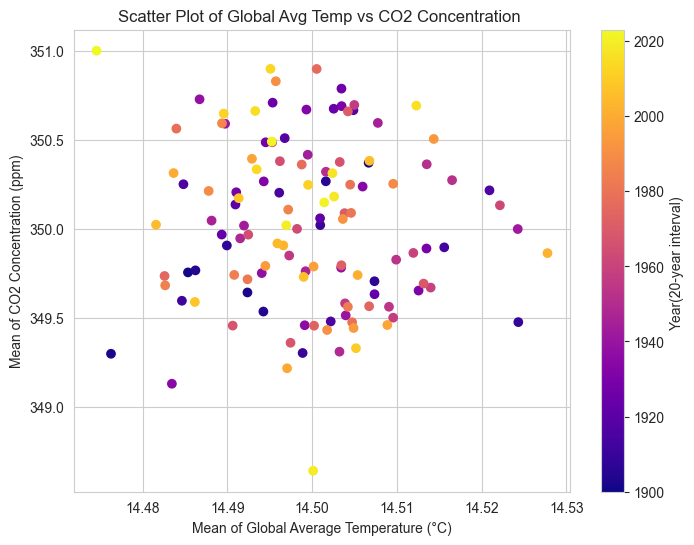

In [30]:
# Scatter plot exploring relationship between Global Temperature and CO2 Concentration

#Using MATPLOTLIB


plt.figure(figsize=(8, 6))

scatter = plt.scatter(
    meanGlobaltemp, 
    meanCo2_concentration, 
    c=years,
    cmap='plasma',
    )

# labels and title
plt.xlabel('Mean of Global Average Temperature (°C)')
plt.ylabel('Mean of CO2 Concentration (ppm)')
plt.title('Scatter Plot of Global Avg Temp vs CO2 Concentration ')

#colorbar to show the year corresponding to each color
cbar = plt.colorbar(scatter)
cbar.set_label('Year(20-year interval) ')

# Show the plot
plt.show()

c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


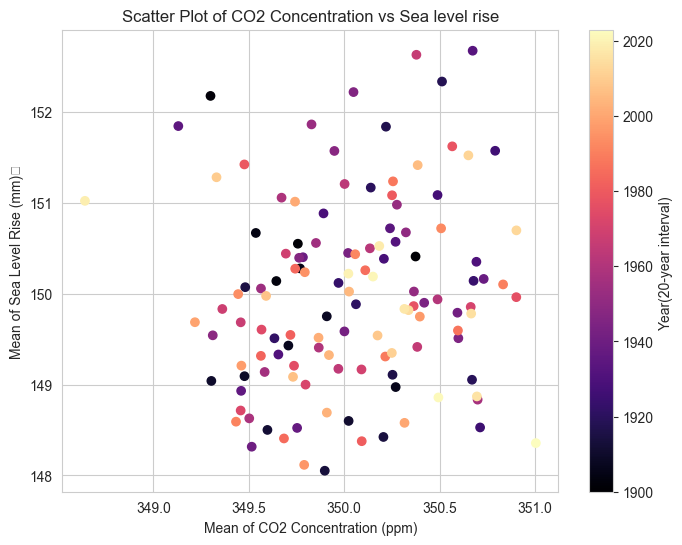

In [31]:
# Scatter plot exploring relationship between CO2 concentration and sea level rise

#Using MATPLOTLIB


plt.figure(figsize=(8, 6))

scatter2 = plt.scatter(
    meanCo2_concentration, 
    meanSea_level_rise, 
    c=years,
    cmap='magma',
    )

# labels and title
plt.xlabel('Mean of CO2 Concentration (ppm)')
plt.ylabel('Mean of Sea Level Rise (mm)	')
plt.title('Scatter Plot of CO2 Concentration vs Sea level rise')

#colorbar to show the year corresponding to each color
cbar = plt.colorbar(scatter2)
cbar.set_label('Year(20-year interval) ')

# Show the plot
plt.show()

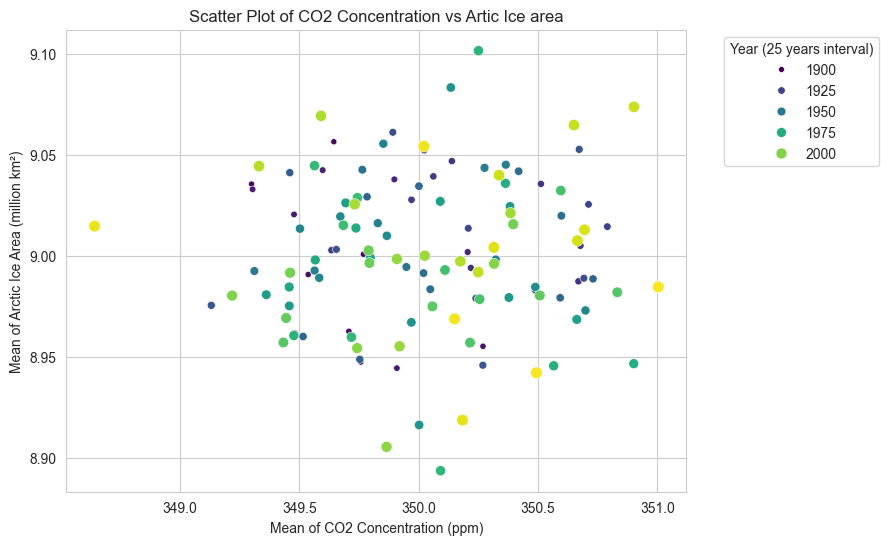

In [32]:
# Scatter plot exploring relationship between CO2 concentration and Arctic ice area


#Using SEABORN


plt.figure(figsize=(8, 6))
scatter = sns.scatterplot(
    data= df_grouped_by_year,
    x= meanCo2_concentration ,
    y = meanArtic_ice_area  ,
    hue= years,           
    palette='viridis',   
    size='Year',         
)

# Add labels and title
plt.xlabel('Mean of CO2 Concentration (ppm)')
plt.ylabel('Mean of Arctic Ice Area (million km²)')
plt.title('Scatter Plot of CO2 Concentration vs Artic Ice area')

# Show the legend with years
plt.legend(title='Year (25 years interval)', bbox_to_anchor=(1.05, 1), loc='upper left')



# Show the plot
plt.show()

In [33]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning, module="IPython.core.pylabtools")

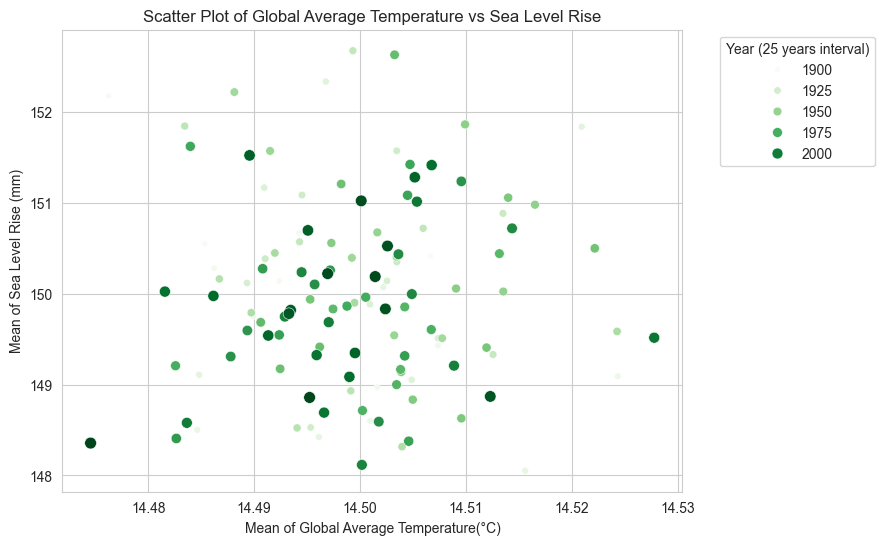

In [34]:
# Scatter plot exploring relationship between Global Temperatures vs Sea Level Rise

plt.figure(figsize=(8, 6))
scatter = sns.scatterplot(
    data= df_grouped_by_year,
    x= meanGlobaltemp ,
    y = meanSea_level_rise  ,
    hue= years,           
    palette='Greens',   
    size='Year',         
)

# Add labels and title
plt.xlabel('Mean of Global Average Temperature(°C)')
plt.ylabel('Mean of Sea Level Rise (mm)')
plt.title('Scatter Plot of Global Average Temperature vs Sea Level Rise')

# Show the legend with years
plt.legend(title='Year (25 years interval)', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

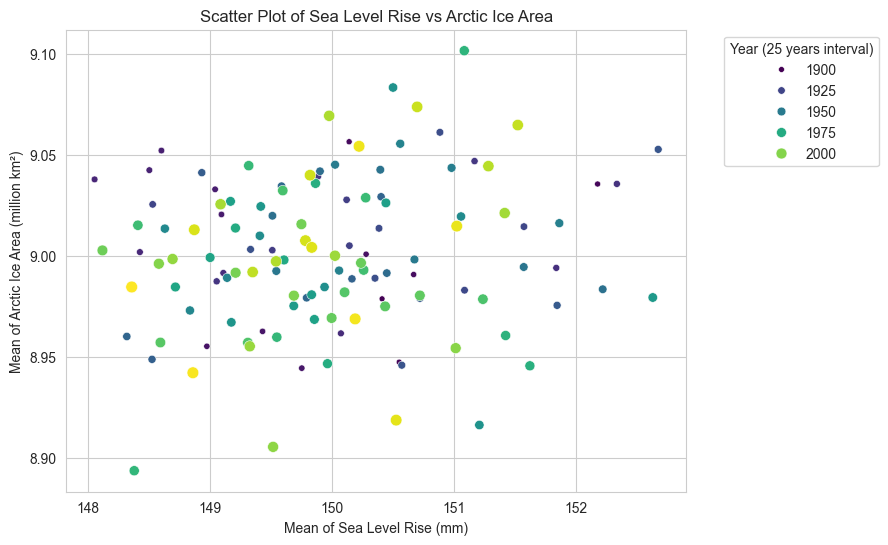

In [35]:
# Scatter plot exploring relationship between Sea Level Rise vs Arctic Ice Area

plt.figure(figsize=(8, 6))
scatter = sns.scatterplot(
    data= df_grouped_by_year,
    x= meanSea_level_rise ,
    y = meanArtic_ice_area  ,
    hue= years,           
    palette='viridis',   
    size='Year',         
)

# Add labels and title
plt.xlabel('Mean of Sea Level Rise (mm)')
plt.ylabel('Mean of Arctic Ice Area (million km²)')
plt.title('Scatter Plot of Sea Level Rise vs Arctic Ice Area')

# Show the legend with years
plt.legend(title='Year (25 years interval)', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

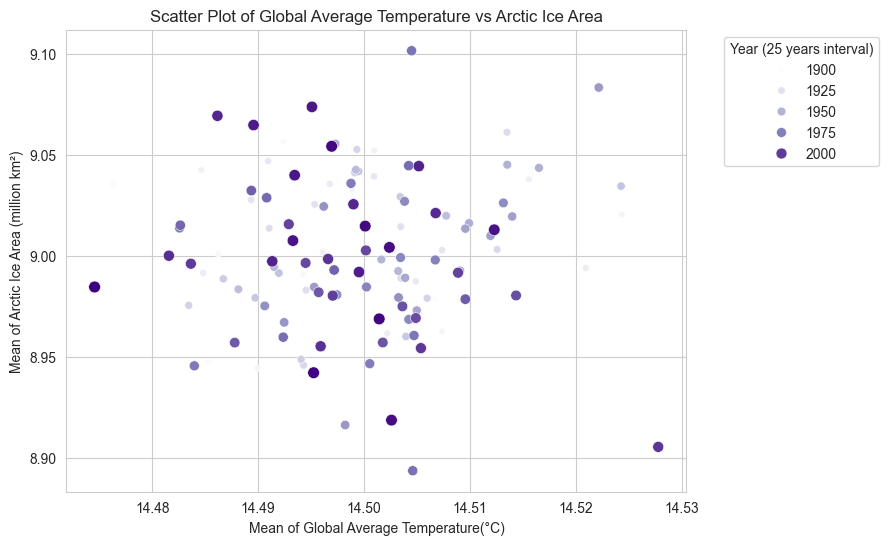

In [36]:
# Scatter plot exploring relationship between Global Temperatures vs Arctic Ice Area

plt.figure(figsize=(8, 6))
scatter = sns.scatterplot(
    data= df_grouped_by_year,
    x= meanGlobaltemp ,
    y = meanArtic_ice_area  ,
    hue= years,           
    palette='Purples',
    size='Year',         
)

# Add labels and title
plt.xlabel('Mean of Global Average Temperature(°C)')
plt.ylabel('Mean of Arctic Ice Area (million km²)')
plt.title('Scatter Plot of Global Average Temperature vs Arctic Ice Area')

# Show the legend with years
plt.legend(title='Year (25 years interval)', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

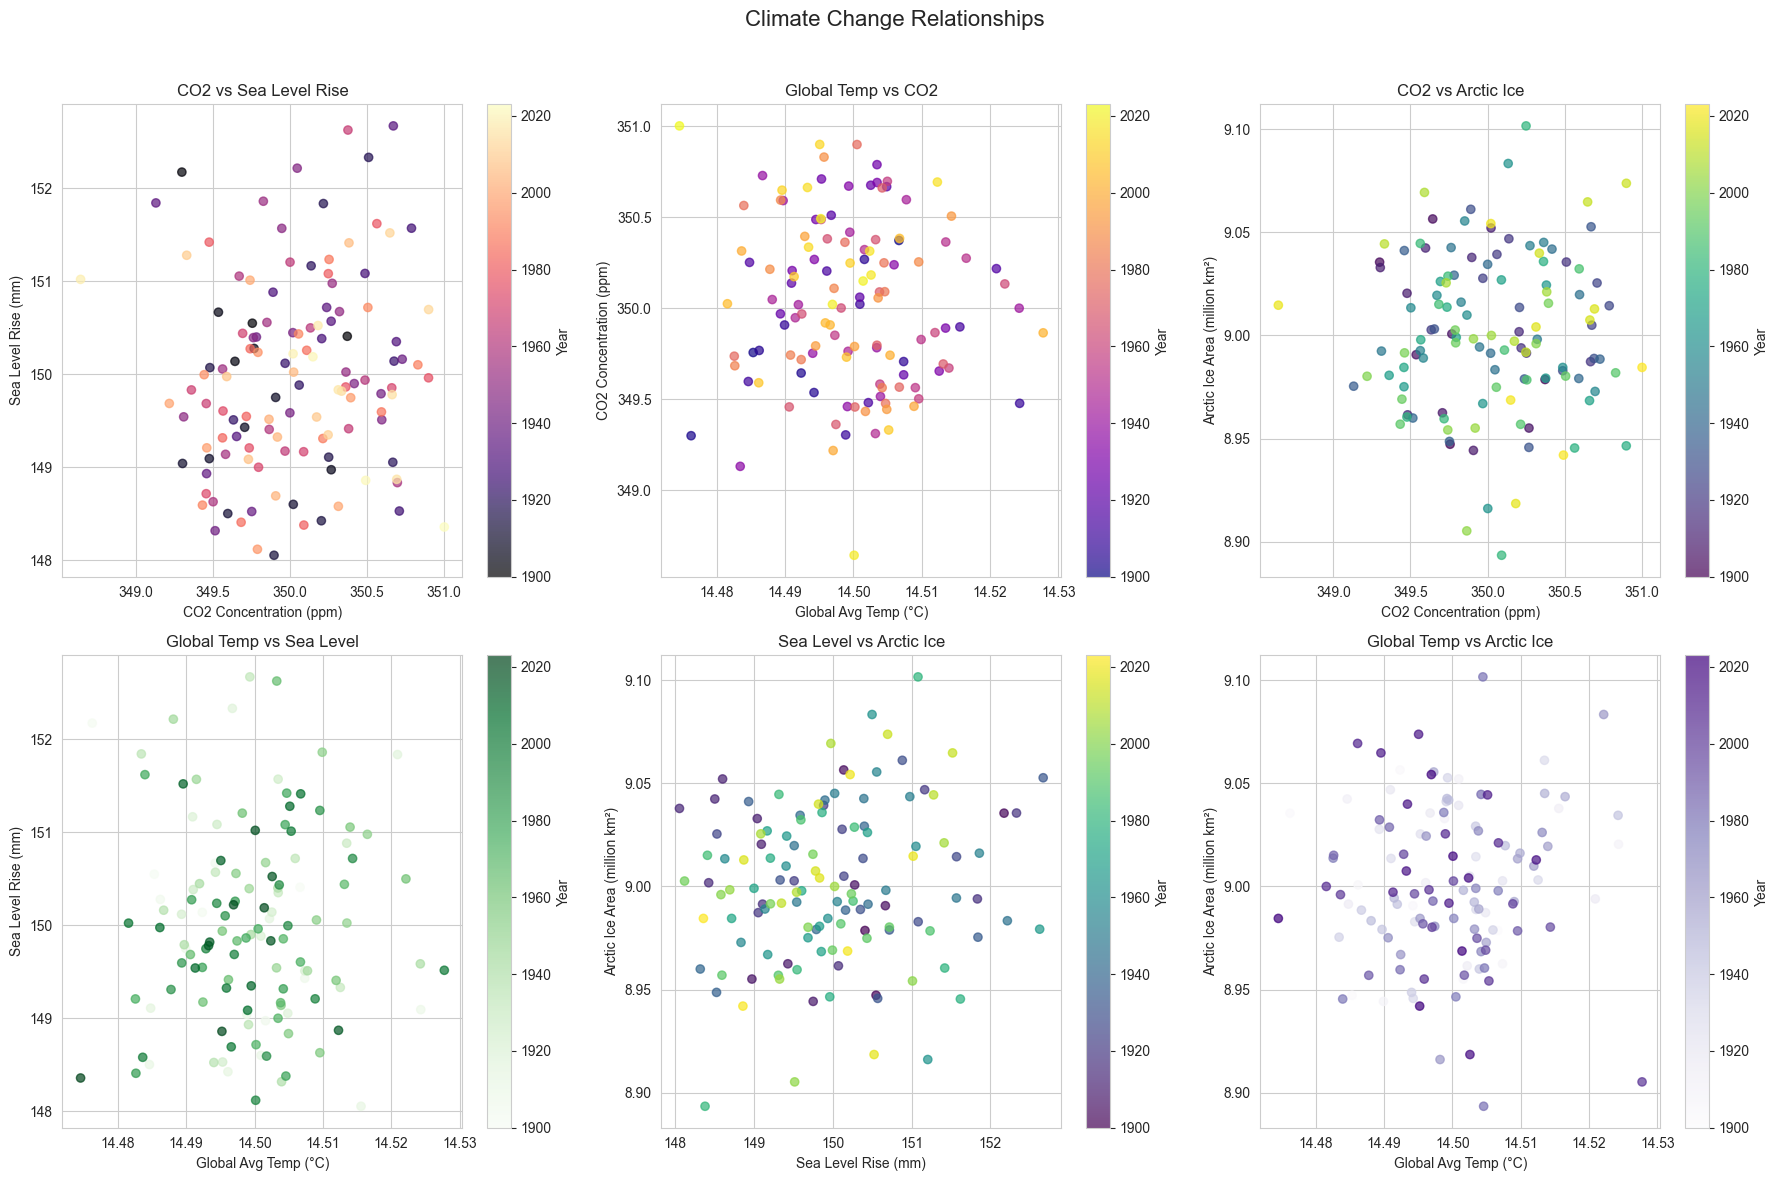

In [37]:
# Create a figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Climate Change Relationships', fontsize=16)

# Define subplot positions
plots = [
    (axes[0, 0], meanCo2_concentration, meanSea_level_rise, 'magma', 'CO2 Concentration (ppm)', 'Sea Level Rise (mm)', 'CO2 vs Sea Level Rise'),
    (axes[0, 1], meanGlobaltemp, meanCo2_concentration, 'plasma', 'Global Avg Temp (°C)', 'CO2 Concentration (ppm)', 'Global Temp vs CO2'),
    (axes[0, 2], meanCo2_concentration, meanArtic_ice_area, 'viridis', 'CO2 Concentration (ppm)', 'Arctic Ice Area (million km²)', 'CO2 vs Arctic Ice'),
    (axes[1, 0], meanGlobaltemp, meanSea_level_rise, 'Greens', 'Global Avg Temp (°C)', 'Sea Level Rise (mm)', 'Global Temp vs Sea Level'),
    (axes[1, 1], meanSea_level_rise, meanArtic_ice_area, 'viridis', 'Sea Level Rise (mm)', 'Arctic Ice Area (million km²)', 'Sea Level vs Arctic Ice'),
    (axes[1, 2], meanGlobaltemp, meanArtic_ice_area, 'Purples', 'Global Avg Temp (°C)', 'Arctic Ice Area (million km²)', 'Global Temp vs Arctic Ice')
]

# Loop through and create scatter plots
for ax, x, y, cmap, xlabel, ylabel, title in plots:
    scatter = ax.scatter(x, y, c=years, cmap=cmap, alpha=0.7)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    cbar = fig.colorbar(scatter, ax=ax)
    cbar.set_label('Year')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

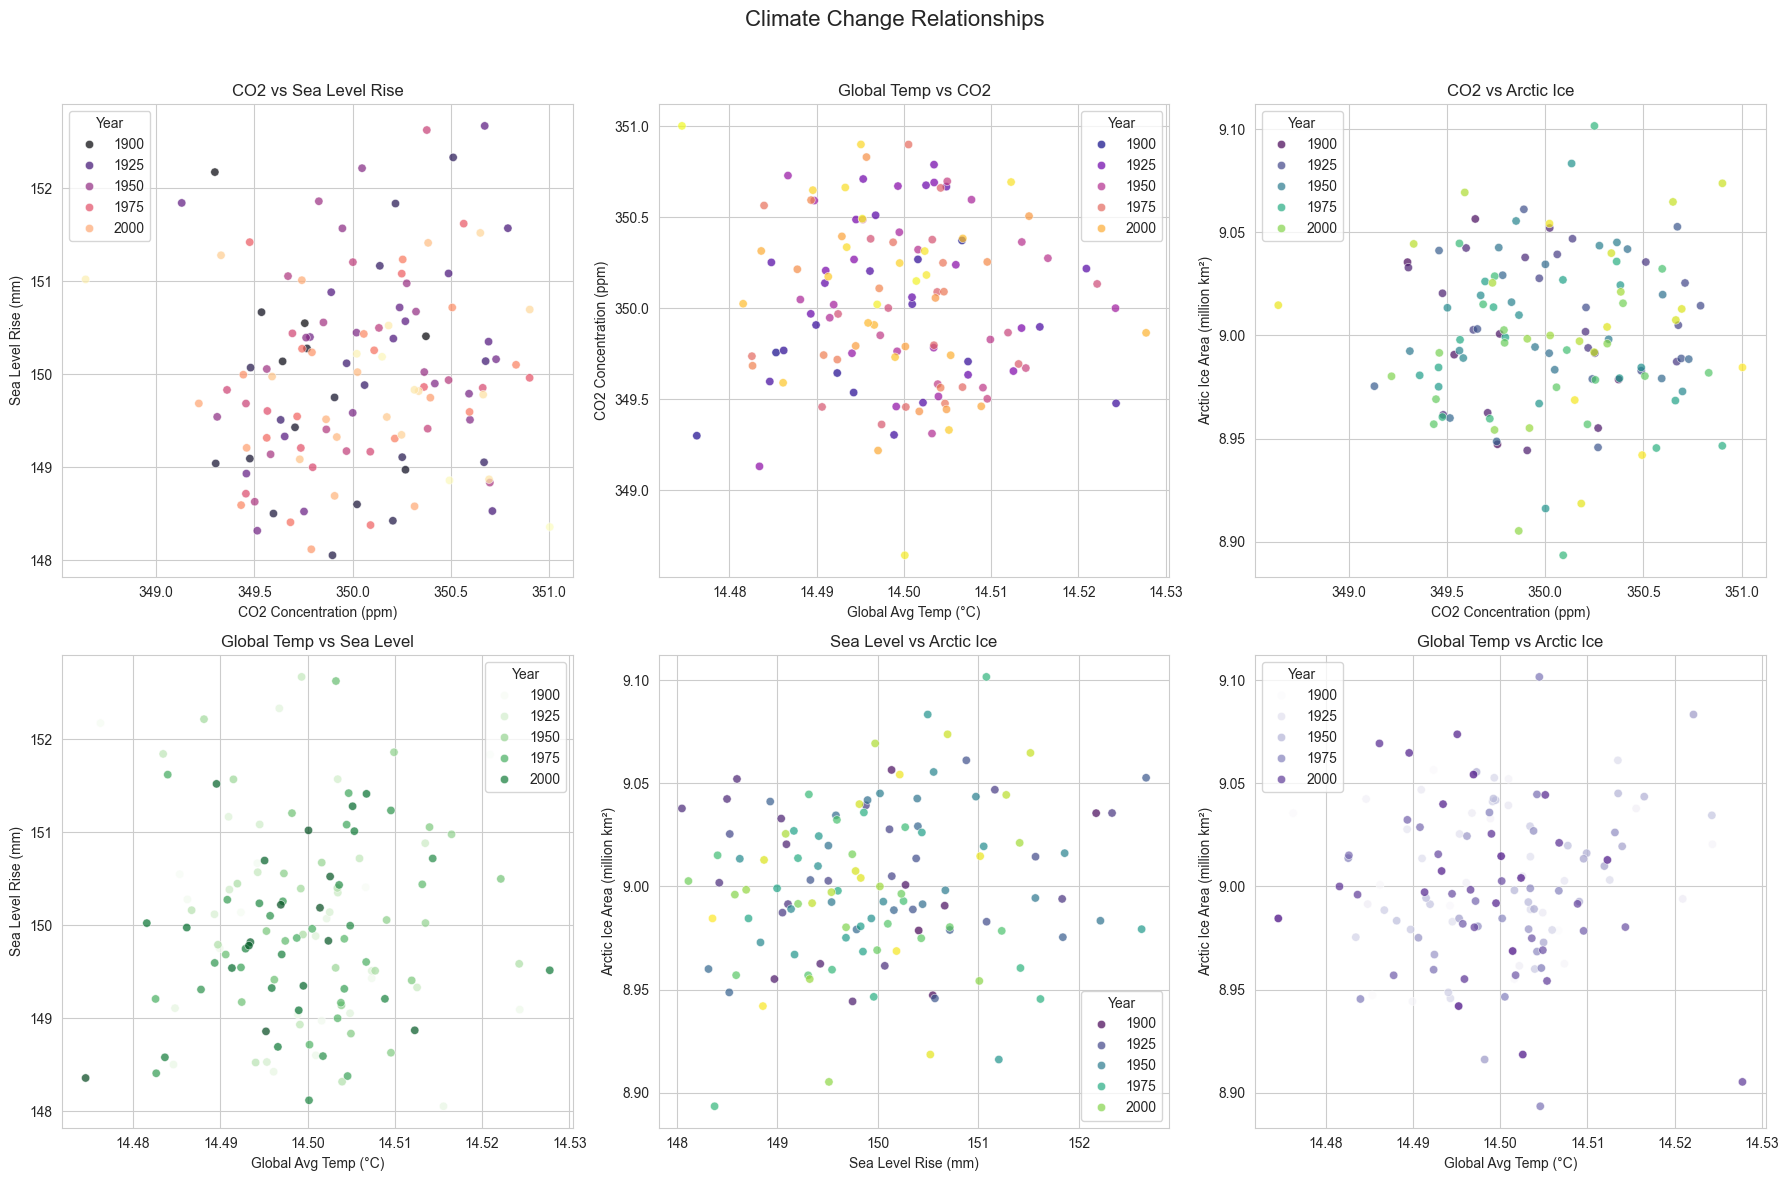

In [38]:

# Create a figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Climate Change Relationships', fontsize=16)

# Define subplot positions
plots = [
    (axes[0, 0], meanCo2_concentration, meanSea_level_rise, 'magma', 'CO2 Concentration (ppm)', 'Sea Level Rise (mm)', 'CO2 vs Sea Level Rise'),
    (axes[0, 1], meanGlobaltemp, meanCo2_concentration, 'plasma', 'Global Avg Temp (°C)', 'CO2 Concentration (ppm)', 'Global Temp vs CO2'),
    (axes[0, 2], meanCo2_concentration, meanArtic_ice_area, 'viridis', 'CO2 Concentration (ppm)', 'Arctic Ice Area (million km²)', 'CO2 vs Arctic Ice'),
    (axes[1, 0], meanGlobaltemp, meanSea_level_rise, 'Greens', 'Global Avg Temp (°C)', 'Sea Level Rise (mm)', 'Global Temp vs Sea Level'),
    (axes[1, 1], meanSea_level_rise, meanArtic_ice_area, 'viridis', 'Sea Level Rise (mm)', 'Arctic Ice Area (million km²)', 'Sea Level vs Arctic Ice'),
    (axes[1, 2], meanGlobaltemp, meanArtic_ice_area, 'Purples', 'Global Avg Temp (°C)', 'Arctic Ice Area (million km²)', 'Global Temp vs Arctic Ice')
]

# Loop through and create scatter plots
for ax, x, y, cmap, xlabel, ylabel, title in plots:
    scatter = sns.scatterplot(x=x, y=y, hue=years, palette=cmap, ax=ax, alpha=0.7)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

handles, labels = axes[0, 0].get_legend_handles_labels()

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [39]:
corelation_matrix = df.corr()
corelation_matrix

,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
Year,1.000000,-0.000500,0.000945,-0.000969,-0.000881
Global Average Temperature (°C),-0.000500,1.000000,-0.001417,-0.000013,0.000702
CO2 Concentration (ppm),0.000945,-0.001417,1.000000,0.000206,-0.000541
Sea Level Rise (mm),-0.000969,-0.000013,0.000206,1.000000,0.000825
Arctic Ice Area (million km²),-0.000881,0.000702,-0.000541,0.000825,1.000000


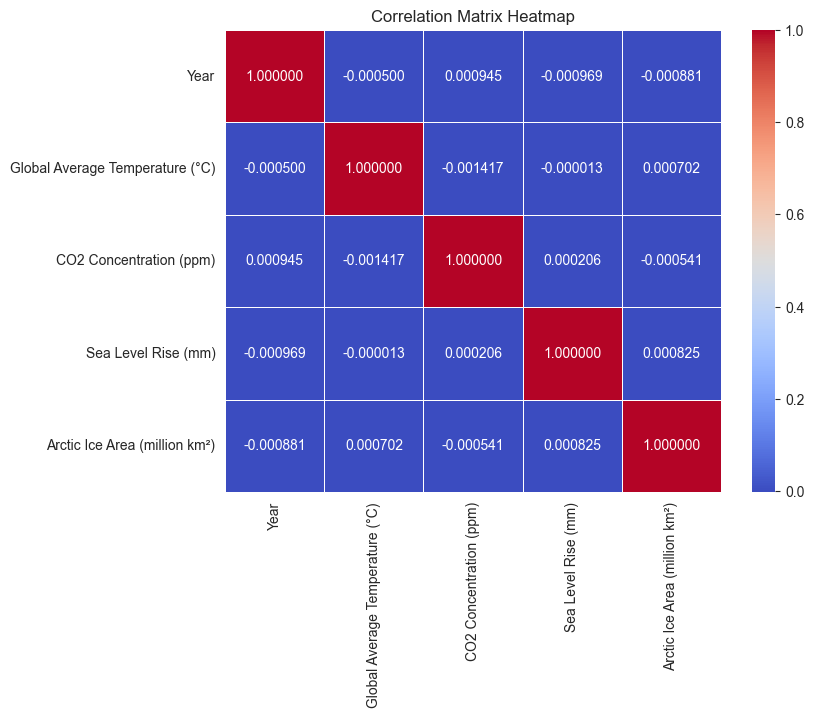

In [44]:
# Plotting Correlation Matrix Heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(corelation_matrix, annot=True, cmap='coolwarm', fmt=".6f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()
